In [1]:
import torch
import torch.distributions as dist
import matplotlib.pyplot as plt

In [2]:
mu_pro = 2.5
sigma_pro = 0.2
mu_amateur = 4
sigma_amateur = 0.5

# Question 2a
times = torch.tensor([2.5, 3, 3.5])

pro_distribution = dist.Normal(mu_pro, sigma_pro)
amateur_distribution = dist.Normal(mu_amateur, sigma_amateur)

likelihood_pro = pro_distribution.log_prob(times).exp()
likelihood_amateur = amateur_distribution.log_prob(times).exp()

total_prob_pro = likelihood_pro / (likelihood_pro + likelihood_amateur)
total_prob_amateur = likelihood_amateur / (likelihood_pro + likelihood_amateur)

print(total_prob_pro)
print(total_prob_amateur)

tensor([9.9558e-01, 4.4801e-01, 1.5360e-05])
tensor([0.0044, 0.5520, 1.0000])


In [3]:
prior_pro = 0.10
prior_amateur = 1 - prior_pro

# Question 2b
evidence = (likelihood_pro * prior_pro) + (likelihood_amateur * prior_amateur)

posterior_pro = (likelihood_pro * prior_pro) / evidence
posterior_amateur = (likelihood_amateur * prior_amateur) / evidence

print(posterior_pro)
print(posterior_amateur)

tensor([9.6155e-01, 8.2721e-02, 1.7067e-06])
tensor([0.0385, 0.9173, 1.0000])


In [4]:
# Question 2c
classification = []
for i in range(len(times)):
    if posterior_pro[i] > posterior_amateur[i]:
        classification.append("Professional")
    else:
        classification.append("Amateur")

print(classification)

['Professional', 'Amateur', 'Amateur']


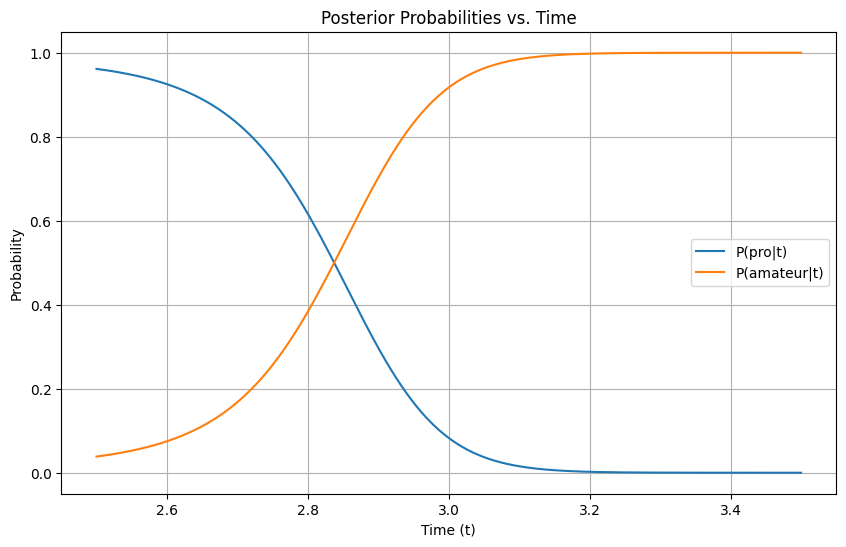

looks like about 2.825


In [5]:
# Question 2d
times = torch.linspace(2.5, 3.5, 1000)

posterior_pro = []
posterior_amateur = []

for t in times:
    likelihood_pro = pro_distribution.log_prob(t).exp()
    likelihood_amateur = amateur_distribution.log_prob(t).exp()

    evidence = (likelihood_pro * prior_pro) + (likelihood_amateur * prior_amateur)

    posterior_pro.append((likelihood_pro * prior_pro) / evidence)
    posterior_amateur.append((likelihood_amateur * prior_amateur) / evidence)

posterior_pro = torch.stack(posterior_pro)
posterior_amateur = torch.stack(posterior_amateur)

plt.figure(figsize=(10, 6))
plt.plot(times, posterior_pro, label='P(pro|t)')
plt.plot(times, posterior_amateur, label='P(amateur|t)')
plt.xlabel('Time (t)')
plt.ylabel('Probability')
plt.legend()
plt.grid(True)
plt.title('Posterior Probabilities vs. Time')
plt.show()

print('looks like about 2.825')

In [6]:
N = 1000

pro_distribution = dist.Normal(mu_pro, sigma_pro)
amateur_distribution = dist.Normal(mu_amateur, sigma_amateur)

misclassifications_pro = 0
misclassifications_amateur = 0

samples_pro = pro_distribution.sample([N])
samples_amateur = amateur_distribution.sample([N])

# Classification and misclassification counting
for t in samples_pro:
    likelihood_pro = pro_distribution.log_prob(t).exp()
    likelihood_amateur = amateur_distribution.log_prob(t).exp()

    evidence = (likelihood_pro * prior_pro) + (likelihood_amateur * prior_amateur)

    posterior_pro = (likelihood_pro * prior_pro) / evidence
    posterior_amateur = (likelihood_amateur * prior_amateur) / evidence

    if posterior_amateur > posterior_pro:
        misclassifications_pro += 1

for t in samples_amateur:
    likelihood_pro = pro_distribution.log_prob(t).exp()
    likelihood_amateur = amateur_distribution.log_prob(t).exp()

    evidence = (likelihood_pro * prior_pro) + (likelihood_amateur * prior_amateur)

    posterior_pro = (likelihood_pro * prior_pro) / evidence
    posterior_amateur = (likelihood_amateur * prior_amateur) / evidence

    if posterior_pro > posterior_amateur:
        misclassifications_amateur += 1

prob_misclassification_pro = misclassifications_pro / N
prob_misclassification_amateur = misclassifications_amateur / N

print(prob_misclassification_pro)
print(prob_misclassification_amateur)

0.041
0.007
